## Training Results

In [178]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

### Loss Function

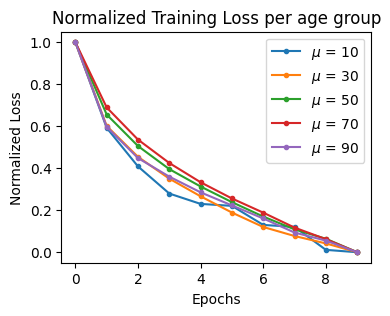

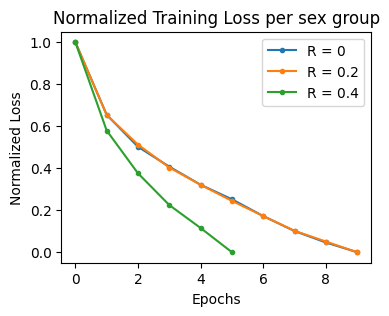

In [383]:
# Loss function for age

for group in ['age','sex']:
    path_age = '/home/juandres/aml/CheXBias/models/Experiment_2/'+group

    # List models
    models = os.listdir(path_age)
    models.sort()

    # Labels
    labels_age = ['$\mu$ = 10', '$\mu$ = 30', '$\mu$ = 50', '$\mu$ = 70', '$\mu$ = 90']
    labels_sex = ['R = 0','R = 0.2','R = 0.4','R = 0.6','R = 0.8','R = 1']

    if group == 'age':
        labels = labels_age
    else:
        labels = labels_sex 

    fig = plt.figure(figsize=(4,3))
    for i, model in enumerate(models):
        try:
            results_test = os.path.join(path_age, model, 'results_train_data.csv')
            df = pd.read_csv(results_test)       
            norm_loss = (df['loss'] - min(df['loss']))/(max(df['loss']) - min(df['loss'])) 
            plt.plot(norm_loss, '-o', label=labels[i],markersize=3)
        except:
            continue

    plt.legend()
    plt.ylabel('Normalized Loss')
    plt.xlabel('Epochs')    
    if group == 'sex':
        plt.title('Normalized Training Loss per sex group')
    else: 
        plt.title('Normalized Training Loss per age group')
    plt.show()

### Metrics during Training

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


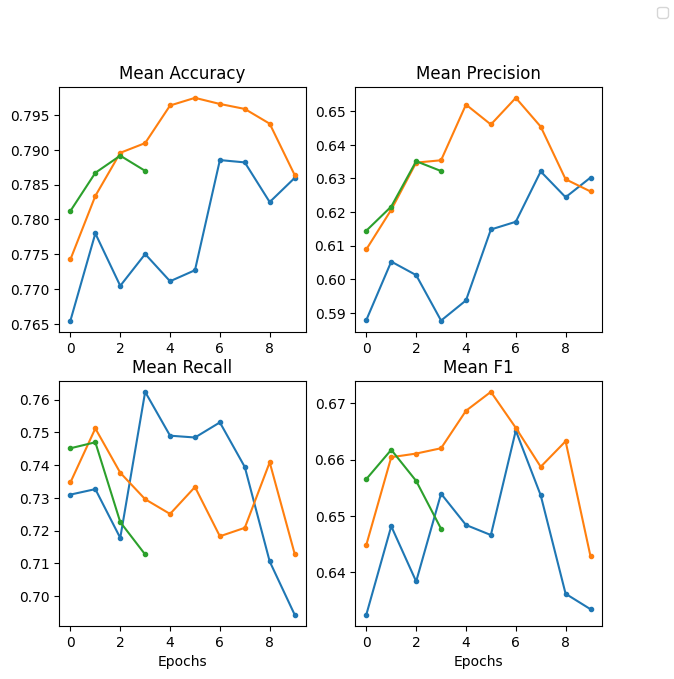

In [277]:
# Loss function for age

for group in ['sex']:
    path_age = '/home/juandres/aml/CheXBias/models/Experiment_2/'+group

    # List models
    models = os.listdir(path_age)
    models.sort()

    # Labels
    labels_age = ['$\mu$ = 10', '$\mu$ = 30', '$\mu$ = 50', '$\mu$ = 70', '$\mu$ = 90']
    labels_sex = ['R = 0','R = 0.2','R = 0.4','R = 0.6','R = 0.8','R = 1']

    if group == 'age':
        labels = labels_age
    else:
        labels = labels_sex 

    fig,ax  = plt.subplots(2,2,figsize = (7,7))
    order = [[0,0],[0,1],[1,0],[1,1]]
    for i,metric in enumerate(['mean_accuracy','mean_precision','mean_recall','mean_f1']):
        metric_pretty_name = ['Mean Accuracy','Mean Precision','Mean Recall','Mean F1']
        # Iterate over each model 
        for model in models:
            try:
                results_test = os.path.join(path_age, model, 'results_test_data.csv')
                df = pd.read_csv(results_test)                   
                ax[order[i][0],order[i][1]].plot(df[metric], '-o',markersize=3)                
            except:
                continue
        
        if order[i][0] == 1:
            ax[order[i][0],order[i][1]].set_xlabel('Epochs')
        ax[order[i][0],order[i][1]].set_title(metric_pretty_name[i])
    
    fig.legend()
        
            

### Metrics by Class

/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

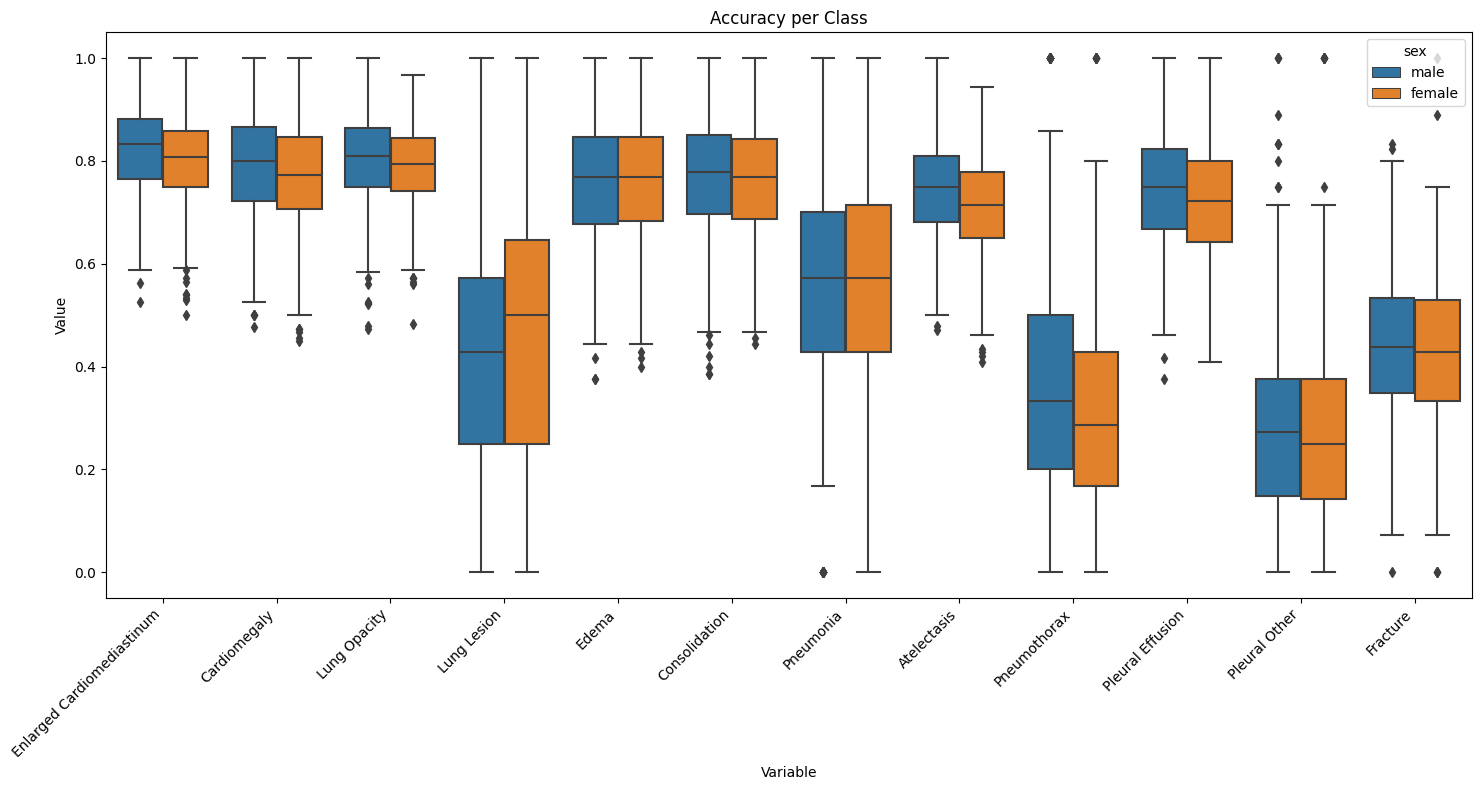

/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/juandres/anaconda3/envs/pytorch_new/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

Text(0, 0.5, '# of classes with p < 0.05')

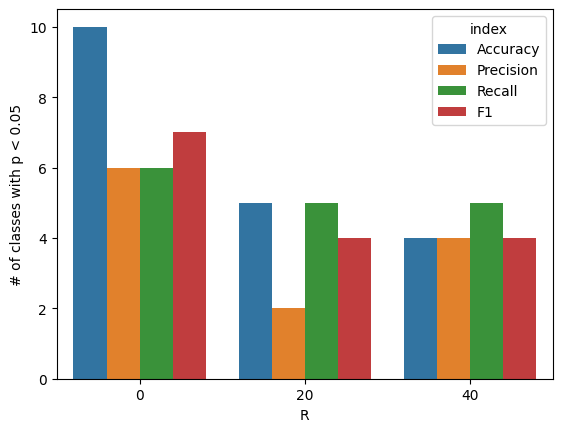

In [382]:
# Set the path to results of the experiment
path_to_results = '/home/juandres/aml/CheXBias/reports/Experiment_2'

# List all models under sex
all_models = os.listdir(os.path.join(path_to_results,'sex'))
all_models.sort()

sdf_per_metric = []

# Metric to use 
for metric in ['accuracy','precision','recall','f1']:

    # Iterate over each model

    # Count number of diferences per model
    sdf_model = []

    for model in models:
        # Per each model load male and female results
        all_df = pd.DataFrame()
        for sex in ['male','female']:
            # Load results
            df = pd.read_csv(os.path.join(path_to_results,'sex',model,sex,metric+'.csv'))   
            df['sex'] = sex 
            all_df = pd.concat([all_df,df])
        
        # Melt the DataFrame to long format for box plotting
        melted_df = pd.melt(all_df, id_vars='sex', var_name='Variable', value_name='Value')

        if metric == 'precision' and model == 'female_0':

            # Set up the matplotlib figure
            plt.figure(figsize=(15, 8))
        
            # Create a box plot using Seaborn
            sns.boxplot(x='Variable', y='Value', hue='sex', data=melted_df)
        
            # Customize the plot
            plt.title('Accuracy per Class')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
        
            # Show the plot
            plt.show()

        # If not, replace 'melted_df' with your DataFrame name
        melted_df = melted_df

        # Perform Mann-Whitney U test for each variable
        variables = melted_df['Variable'].unique()
        results = []
        count_of_classes_with_significant_diference = 0

        for variable in variables:
            male_values = melted_df[(melted_df['sex'] == 'male') & (melted_df['Variable'] == variable)]['Value']
            female_values = melted_df[(melted_df['sex'] == 'female') & (melted_df['Variable'] == variable)]['Value']

            # Perform Mann-Whitney U test
            stat, p_value = mannwhitneyu(male_values, female_values)

            # Store results
            results.append({'Variable': variable, 'Stat': stat, 'P-value': p_value})

            # Test results of pvalue
            if p_value < 0.05:
                count_of_classes_with_significant_diference += 1
            
        sdf_model.append(count_of_classes_with_significant_diference)


        # Create a DataFrame from the results
        #results_melted_df = pd.DataFrame(results)

        # Display the results
        #print(results_melted_df)
    
    sdf_per_metric.append(sdf_model)

results = pd.DataFrame(sdf_per_metric,columns=['0','20','40'],index=['Accuracy','Precision','Recall','F1']).reset_index().rename_axis(index='Metrics')
results = pd.melt(results, id_vars='index', var_name='R', value_name='Value')
sns.barplot(data = results, x = 'R', y = 'Value',hue='index').set_ylabel('# of classes with p < 0.05')
